# SCDL Project

## Name: Abdul Rahim Ansari
## Reg No: 201905854

In [1]:
## Load Libraries

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# initialize matplotlib by using inline
%matplotlib inline
plt.style.use('bmh')

print(pd.__version__)

1.2.4


In [3]:
df = pd.read_csv('listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,278,2020-02-14,1.90,1,152
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,200,1,339,2020-04-09,2.50,2,0
2,25428,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-02-09,0.13,2,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,219,2020-07-25,1.94,1,66
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,336,2020-09-20,2.59,2,335


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17825 non-null  int64  
 1   name                            17793 non-null  object 
 2   host_id                         17825 non-null  int64  
 3   host_name                       17230 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   17825 non-null  object 
 6   latitude                        17825 non-null  float64
 7   longitude                       17825 non-null  float64
 8   room_type                       17825 non-null  object 
 9   price                           17825 non-null  int64  
 10  minimum_nights                  17825 non-null  int64  
 11  number_of_reviews               17825 non-null  int64  
 12  last_review                     

count    17825.000000
mean       154.495877
std        154.162566
min          0.000000
25%         95.000000
50%        129.000000
75%        180.000000
max       8000.000000
Name: price, dtype: float64


c:\users\arahi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


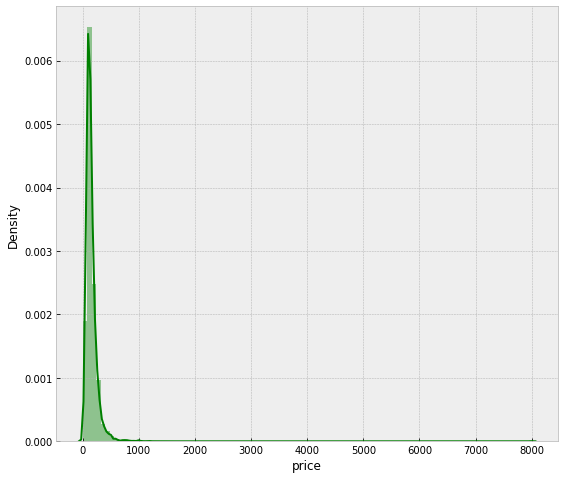

In [5]:
print(df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [6]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [7]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,3159,NaN,52.36435,4.94358,59,3,278,1.90,1,152
1,20168,59484,NaN,52.36407,4.89393,200,1,339,2.50,2,0
2,25428,56142,NaN,52.37490,4.88487,125,14,5,0.13,2,132
3,27886,97647,NaN,52.38761,4.89188,141,2,219,1.94,1,66
4,28871,124245,NaN,52.36775,4.89092,75,2,336,2.59,2,335


In [8]:
df_num = df_num.drop(columns =['neighbourhood_group','latitude','longitude','id','host_id'])
df_num.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,59,3,278,1.90,1,152
1,200,1,339,2.50,2,0
2,125,14,5,0.13,2,132
3,141,2,219,1.94,1,66
4,75,2,336,2.59,2,335


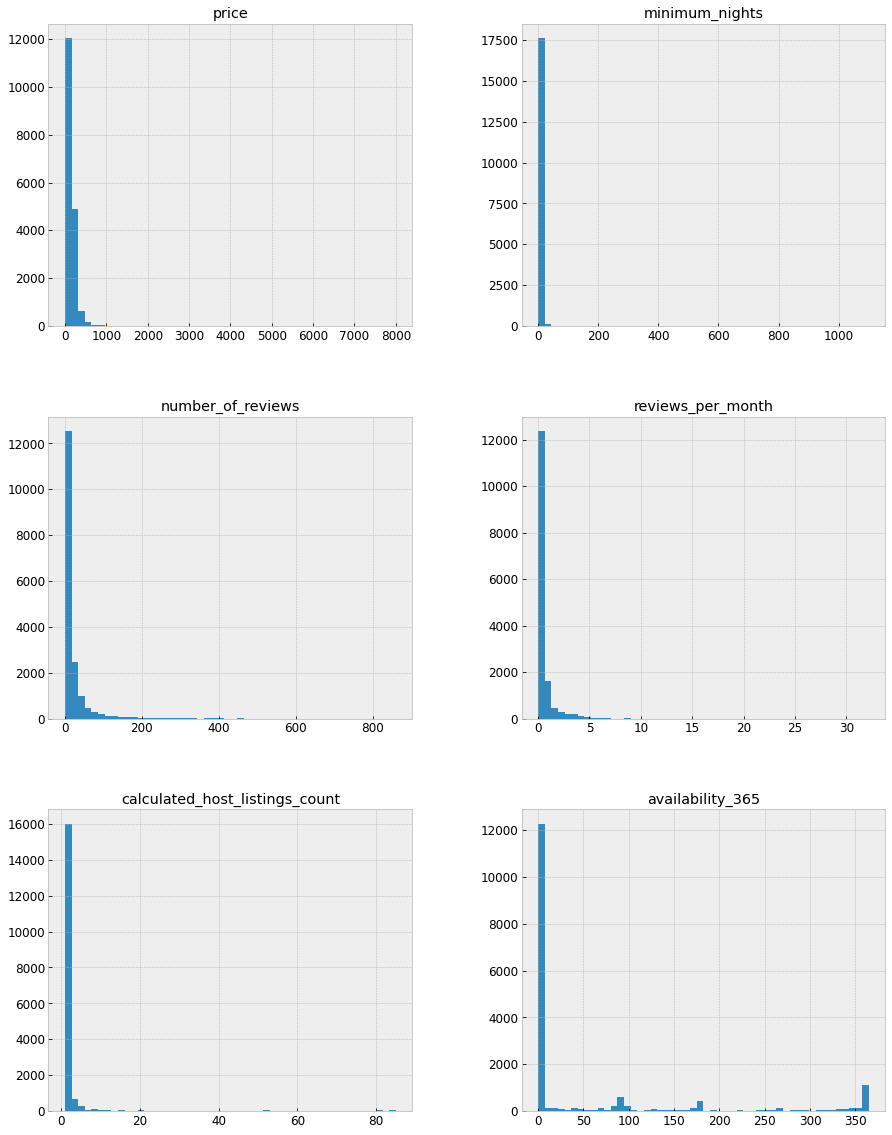

In [9]:
df_num.hist(figsize=(15, 20), bins=50, xlabelsize=12, ylabelsize=12); # ; avoid having the matplotlib verbose informationsR

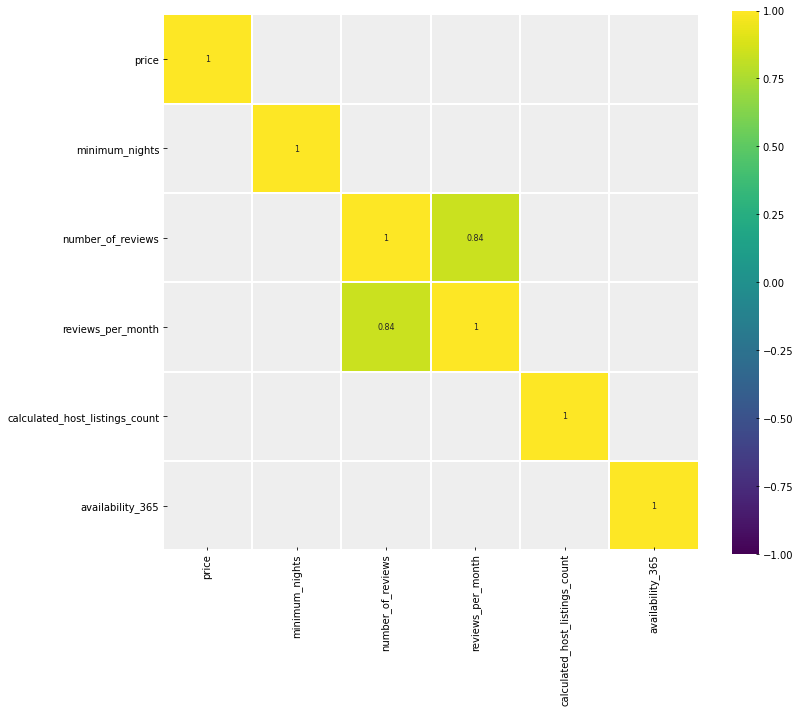

In [10]:
corr = df_num.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [11]:
quantitative_features_list = ['id','host_id','neighbourhood_group','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,3159,NaN,52.36435,4.94358,59,3,278,1.90,1,152
1,20168,59484,NaN,52.36407,4.89393,200,1,339,2.50,2,0
2,25428,56142,NaN,52.37490,4.88487,125,14,5,0.13,2,132
3,27886,97647,NaN,52.38761,4.89188,141,2,219,1.94,1,66
4,28871,124245,NaN,52.36775,4.89092,75,2,336,2.59,2,335


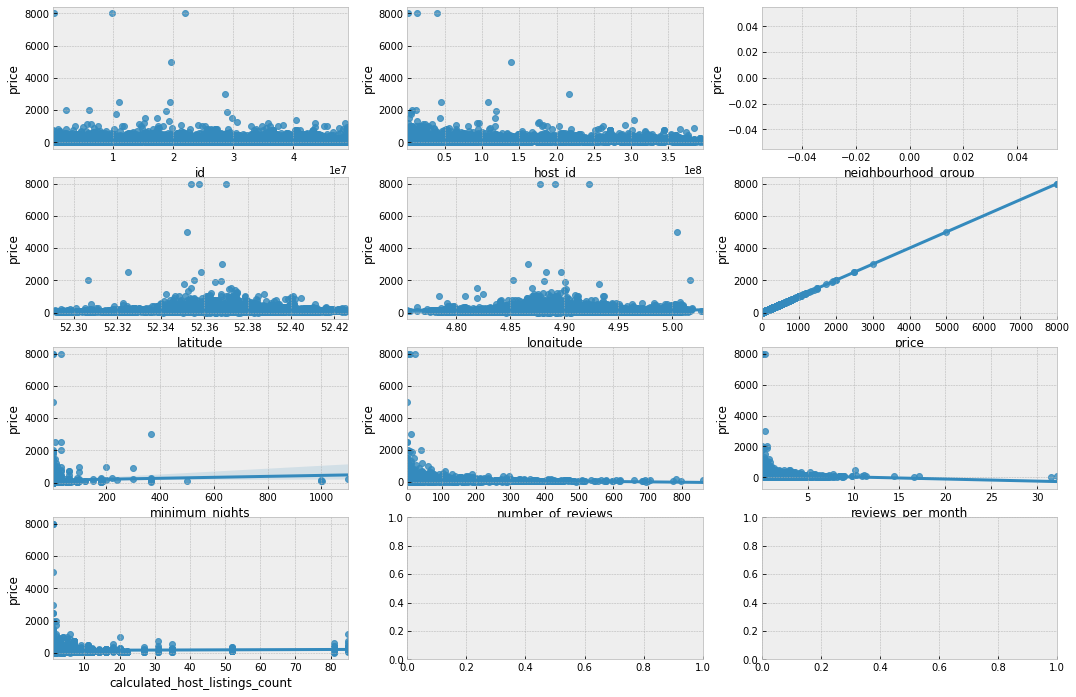

In [12]:
features_to_analyse = ['id','host_id','neighbourhood_group','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='price', data=df[features_to_analyse], ax=ax)

# Categorial

In [13]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
#categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
cat_temp = ['name','host_name','neighbourhood','room_type','last_review','availability_365','price','number_of_reviews']
df_categ = df[cat_temp]
df_categ.head()

,name,host_name,neighbourhood,room_type,last_review,availability_365,price,number_of_reviews
0,Quiet Garden View Room & Super Fast WiFi,Daniel,Oostelijk Havengebied - Indische Buurt,Private room,2020-02-14,152,59,278
1,Studio with private bathroom in the centre 1,Alexander,Centrum-Oost,Private room,2020-04-09,0,200,339
2,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Joan,Centrum-West,Entire home/apt,2020-02-09,132,125,5
3,"Romantic, stylish B&B houseboat in canal district",Flip,Centrum-West,Private room,2020-07-25,66,141,219
4,Comfortable double room,Edwin,Centrum-West,Private room,2020-09-20,335,75,336


In [14]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 5 non numerical features including:
['name', 'host_name', 'neighbourhood', 'room_type', 'last_review']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Oostelijk Havengebied - Indische Buurt'),
  Text(1, 0, 'Centrum-Oost'),
  Text(2, 0, 'Centrum-West'),
  Text(3, 0, 'Zuid'),
  Text(4, 0, 'De Pijp - Rivierenbuurt'),
  Text(5, 0, 'De Baarsjes - Oud-West'),
  Text(6, 0, 'Bos en Lommer'),
  Text(7, 0, 'Oud-Oost'),
  Text(8, 0, 'Noord-West'),
  Text(9, 0, 'Westerpark'),
  Text(10, 0, 'Slotervaart'),
  Text(11, 0, 'Oud-Noord'),
  Text(12, 0, 'Watergraafsmeer'),
  Text(13, 0, 'Geuzenveld - Slotermeer'),
  Text(14, 0, 'IJburg - Zeeburgereiland'),
  Text(15, 0, 'Noord-Oost'),
  Text(16, 0, 'Buitenveldert - Zuidas'),
  Text(17, 0, 'De Aker - Nieuw Sloten'),
  Text(18, 0, 'Osdorp'),
  Text(19, 0, 'Bijlmer-Centrum'),
  Text(20, 0, 'Gaasperdam - Driemond'),
  Text(21, 0, 'Bijlmer-Oost')])

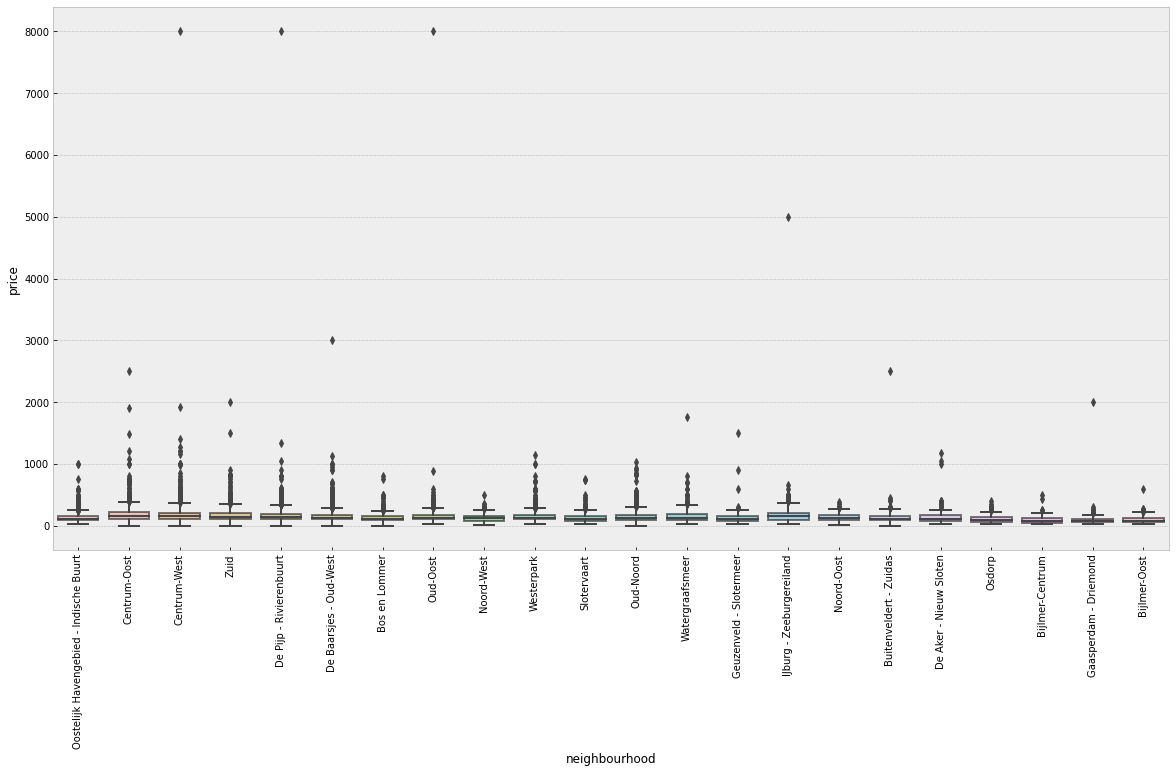

In [15]:
plt.figure(figsize = (20, 10))
ax = sns.boxplot(x='neighbourhood', y='price', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Oostelijk Havengebied - Indische Buurt'),
  Text(1, 0, 'Centrum-Oost'),
  Text(2, 0, 'Centrum-West'),
  Text(3, 0, 'Zuid'),
  Text(4, 0, 'De Pijp - Rivierenbuurt'),
  Text(5, 0, 'De Baarsjes - Oud-West'),
  Text(6, 0, 'Bos en Lommer'),
  Text(7, 0, 'Oud-Oost'),
  Text(8, 0, 'Noord-West'),
  Text(9, 0, 'Westerpark'),
  Text(10, 0, 'Slotervaart'),
  Text(11, 0, 'Oud-Noord'),
  Text(12, 0, 'Watergraafsmeer'),
  Text(13, 0, 'Geuzenveld - Slotermeer'),
  Text(14, 0, 'IJburg - Zeeburgereiland'),
  Text(15, 0, 'Noord-Oost'),
  Text(16, 0, 'Buitenveldert - Zuidas'),
  Text(17, 0, 'De Aker - Nieuw Sloten'),
  Text(18, 0, 'Osdorp'),
  Text(19, 0, 'Bijlmer-Centrum'),
  Text(20, 0, 'Gaasperdam - Driemond'),
  Text(21, 0, 'Bijlmer-Oost')])

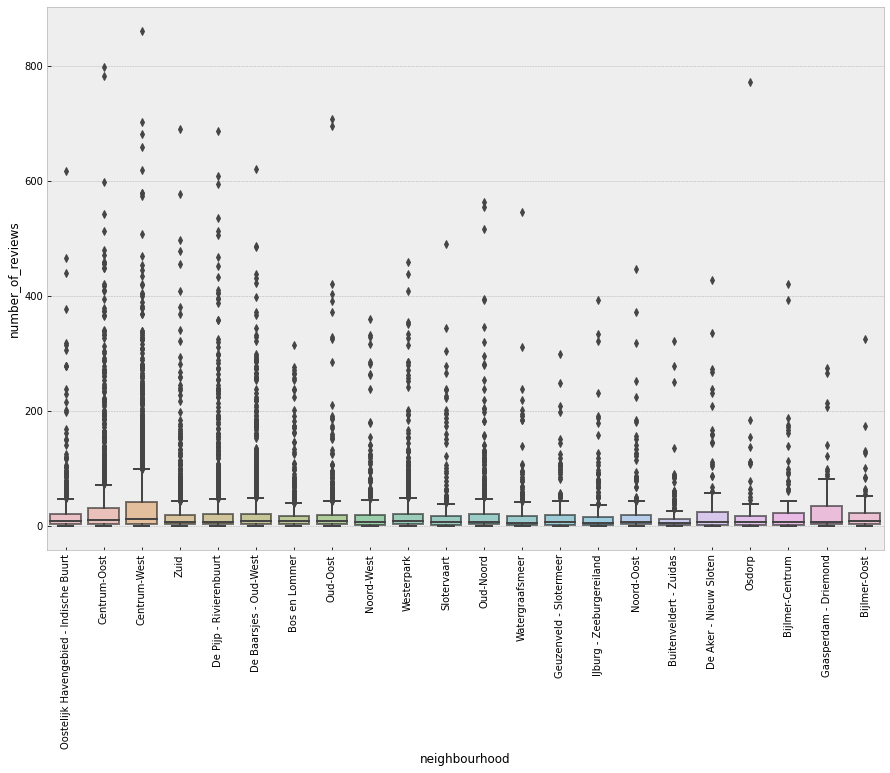

In [16]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x='neighbourhood', y='number_of_reviews', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Oostelijk Havengebied - Indische Buurt'),
  Text(1, 0, 'Centrum-Oost'),
  Text(2, 0, 'Centrum-West'),
  Text(3, 0, 'Zuid'),
  Text(4, 0, 'De Pijp - Rivierenbuurt'),
  Text(5, 0, 'De Baarsjes - Oud-West'),
  Text(6, 0, 'Bos en Lommer'),
  Text(7, 0, 'Oud-Oost'),
  Text(8, 0, 'Noord-West'),
  Text(9, 0, 'Westerpark'),
  Text(10, 0, 'Slotervaart'),
  Text(11, 0, 'Oud-Noord'),
  Text(12, 0, 'Watergraafsmeer'),
  Text(13, 0, 'Geuzenveld - Slotermeer'),
  Text(14, 0, 'Noord-Oost'),
  Text(15, 0, 'Buitenveldert - Zuidas'),
  Text(16, 0, 'IJburg - Zeeburgereiland'),
  Text(17, 0, 'De Aker - Nieuw Sloten'),
  Text(18, 0, 'Osdorp'),
  Text(19, 0, 'Bijlmer-Centrum'),
  Text(20, 0, 'Gaasperdam - Driemond'),
  Text(21, 0, 'Bijlmer-Oost')])

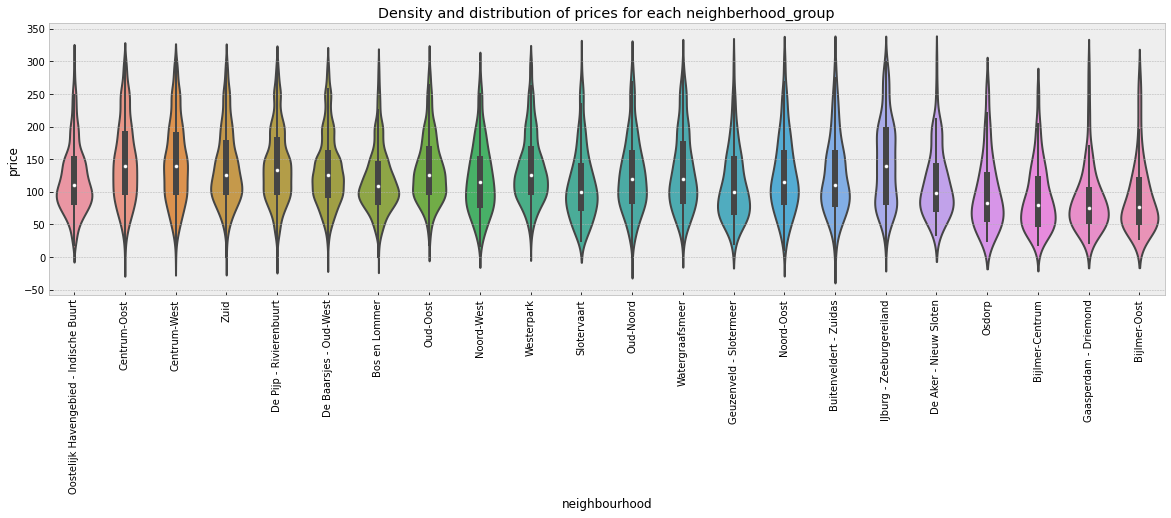

In [17]:
plt.figure(figsize = (20, 5))
sub_6=df_categ[df_categ.price < 300]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(x='neighbourhood', y='price', data=sub_6)
viz_2.set_title('Density and distribution of prices for each neighberhood_group')
plt.xticks(rotation=90)

Observations on price:
price seems to be positively correlated with longitude meaning that one can expect higher prices as position in NYC moves West. This is expected because Manhattan, which is the most expensive borough of the city, is located on the west side of the city
latitude seems to have lesser effect on the price. However, there is a slight indication of higher prices located in the northern parts of the city
price is also positively correlated with: increasing availability, the fact that the property is rented by a host who lists other properties, and increasing number of minimum nights
price is negatively correlated with number of reviews and reviews per month, indicating that it is possible that the prior reviews could depress the prices to some extent
Other interesting observations:
calculated host lisitng count is positively correlated with minimum nights and availability_365 indicating that hosts who list more than one property may be more strategic rather than opportunisitic about their rentals. That may attempt to maximize the amount of time a single renter stays at their property to minimize turnover cost. They also tend to maximize the amount of time the property is being rented.

In [18]:
a=pd.DataFrame(df.dtypes.copy())
b= a[a[0] == 'object'].reset_index()
#drop id and host id:
non_num=b["index"].tolist()
print(non_num)

['name', 'host_name', 'neighbourhood', 'room_type', 'last_review']


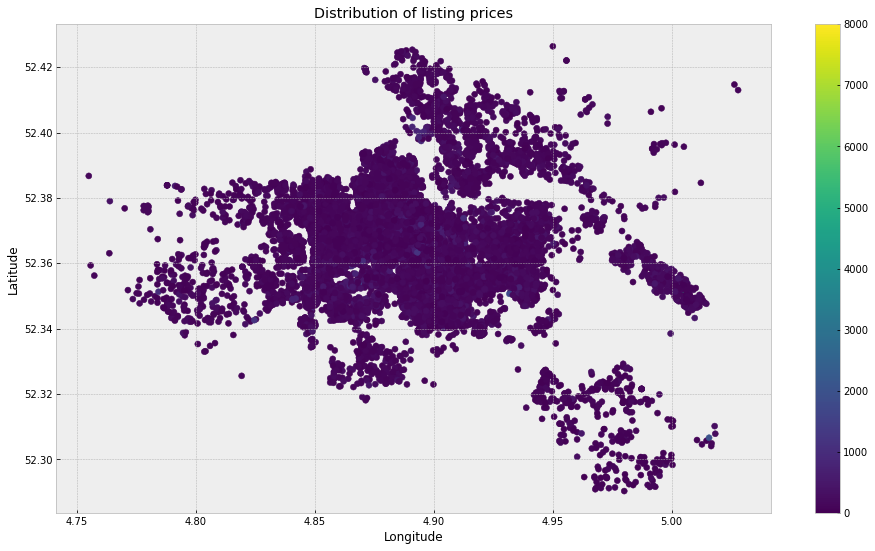

In [19]:
y = df.latitude
x = df.longitude
p = df.price
plt.figure(figsize=(16,9))
plt.scatter(x,y,c=p,cmap='viridis')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of listing prices")
plt.show()

In [20]:
df_listing_summary = df
df_listing_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,278,2020-02-14,1.90,1,152
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,200,1,339,2020-04-09,2.50,2,0
2,25428,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-02-09,0.13,2,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,219,2020-07-25,1.94,1,66
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,336,2020-09-20,2.59,2,335


In [21]:

df_listing_summary["name"] = df_listing_summary["name"].str.lower() # Lower case
df_listing_summary["name"] = df_listing_summary["name"].str.replace('nan', ' ') # Remove punctuations
df_listing_summary["name"] = df_listing_summary["name"].str.replace('[^\\w\\s]', ' ') # Remove punctuations
df_listing_summary["name"] = df_listing_summary["name"].str.replace('\\n', '') # Remove line break
df_listing_summary["name"] = df_listing_summary["name"].str.replace("([^\\x00-\\x7F])+", ' ') # Remove symbols + chinese characters
df_listing_summary["name"] = df_listing_summary["name"].str.replace("[\\u4e00-\\u9fff]+", ' ')
df_listing_summary["name"].str.encode('ascii', 'ignore').str.decode('ascii') # Retain ascii characters, removing foreign characters and emojis
df_listing_summary["name"] = df_listing_summary["name"].dropna().apply(lambda x: ' '.join(x.split())) # Replace multiple whitespaces with 1 whitespace

<ipython-input-21-ad958b49ffec>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listing_summary["name"] = df_listing_summary["name"].str.replace('[^\\w\\s]', ' ') # Remove punctuations
<ipython-input-21-ad958b49ffec>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listing_summary["name"] = df_listing_summary["name"].str.replace('\\n', '') # Remove line break
<ipython-input-21-ad958b49ffec>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listing_summary["name"] = df_listing_summary["name"].str.replace("([^\\x00-\\x7F])+", ' ') # Remove symbols + chinese characters
<ipython-input-21-ad958b49ffec>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listing_summary["name"] = df_listing_summary["name"].str.replace("[\\u4e00-\\u9fff]+", ' ')


In [22]:
df_listing_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,quiet garden view room super fast wifi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,278,2020-02-14,1.90,1,152
1,20168,studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,200,1,339,2020-04-09,2.50,2,0
2,25428,lovely 1 bed apt in ctr w lift 3 20 6 20 flex,56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-02-09,0.13,2,132
3,27886,romantic stylish b b houseboat in canal district,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,219,2020-07-25,1.94,1,66
4,28871,comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,336,2020-09-20,2.59,2,335


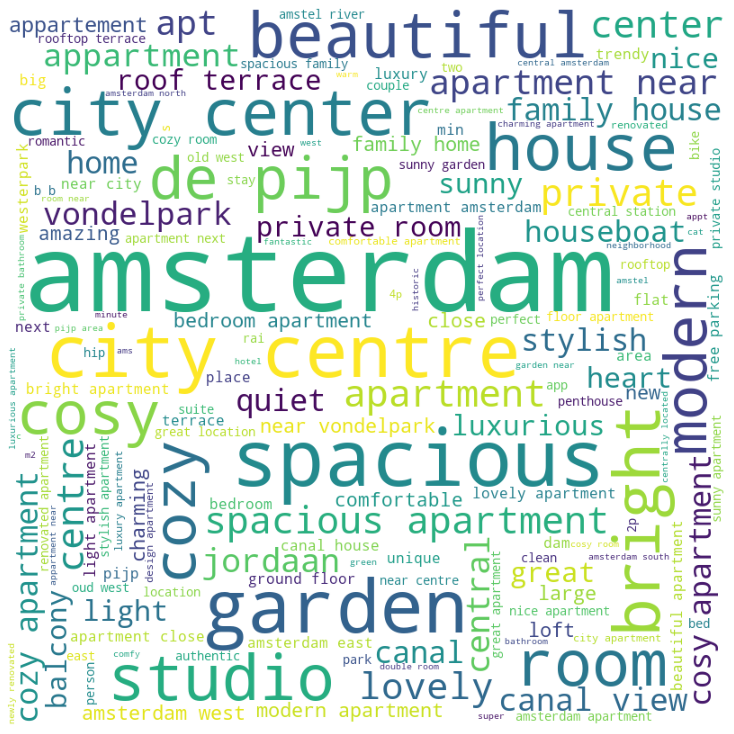

In [23]:
# WordCloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comments = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df_listing_summary.name:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comments += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comments)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [24]:
## Model Training

In [25]:
df_model = df

In [26]:
df_model.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,quiet garden view room super fast wifi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,278,2020-02-14,1.90,1,152
1,20168,studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,200,1,339,2020-04-09,2.50,2,0
2,25428,lovely 1 bed apt in ctr w lift 3 20 6 20 flex,56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-02-09,0.13,2,132
3,27886,romantic stylish b b houseboat in canal district,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,219,2020-07-25,1.94,1,66
4,28871,comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,336,2020-09-20,2.59,2,335


In [27]:
def del_col(data, feat):
    """
    drop feature from data
    """
    new_data = data.drop(feat, axis=1)
    print('Deleting the coloumn {}...'.format(feat))
    return new_data

In [28]:
df_model = del_col(df_model, 'id')
df_model = del_col(df_model, 'name')
df_model = del_col(df_model, 'host_id')
df_model = del_col(df_model, 'host_name')
df_model = del_col(df_model, 'neighbourhood_group')
df_model = del_col(df_model, 'neighbourhood')

Deleting the coloumn id...
Deleting the coloumn name...
Deleting the coloumn host_id...
Deleting the coloumn host_name...
Deleting the coloumn neighbourhood_group...
Deleting the coloumn neighbourhood...


In [29]:
# drop all reviews
for feat in df_model.columns:
    # drop url
    if 'review' in feat:
        df_model = del_col(df_model, feat)

Deleting the coloumn number_of_reviews...
Deleting the coloumn last_review...
Deleting the coloumn reviews_per_month...


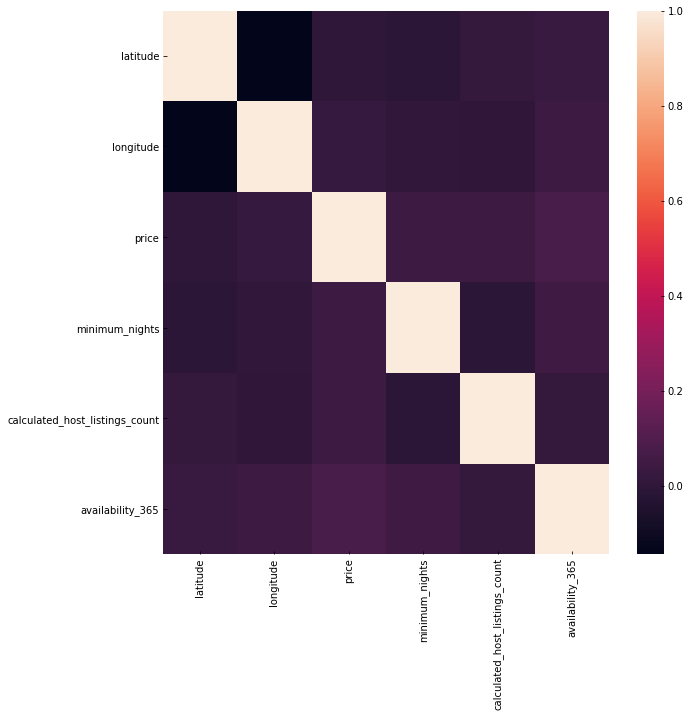

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df_model.corr())
plt.show()

In [31]:
def row2col(feat, data):
    """
    encode an categorical data as one-hot
    """
    print('Ecoding {} as row2col..'.format(feat))
    cur_dummies = pd.get_dummies(data[feat], prefix=feat)
    data.drop(feat, axis=1, inplace=True)
    data = pd.concat([data, cur_dummies], axis=1)
    return data

In [32]:
feats = []
conts = []
for feat in df_model.columns:
    if df_model[feat].dtype == np.float:
        print('{} is a continous varibale'.format(feat))
        # take a look which columns are float
        conts.append(feat)
    elif len(df_model[feat].value_counts()) <= 5:
        # for categorical variables with small categories, encode them as row2col
        df_model = row2col(feat, df_model)
    else:
        # if categorical variables have many distinct values
        feats.append(feat)

latitude is a continous varibale
longitude is a continous varibale
Ecoding room_type as row2col..


<ipython-input-32-3ff062647348>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df_model[feat].dtype == np.float:


In [33]:
df_model.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,52.36435,4.94358,59,3,1,152,0,0,1,0
1,52.36407,4.89393,200,1,2,0,0,0,1,0
2,52.37490,4.88487,125,14,2,132,1,0,0,0
3,52.38761,4.89188,141,2,1,66,0,0,1,0
4,52.36775,4.89092,75,2,2,335,0,0,1,0


In [34]:
from sklearn import preprocessing as p
scaler = p.StandardScaler()
columns = df_model.columns
df_model = scaler.fit_transform(df_model)
df_model = pd.DataFrame(df_model)
df_model.columns = columns

In [35]:
df_model.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-0.069874,1.503228,-0.619467,-0.046288,-0.191111,0.791386,-1.880632,-0.083697,1.935391,-0.052503
1,-0.086759,0.118674,0.295178,-0.153060,-0.077650,-0.537033,-1.880632,-0.083697,1.935391,-0.052503
2,0.566348,-0.133976,-0.191335,0.540958,-0.077650,0.616594,0.531736,-0.083697,-0.516691,-0.052503
3,1.332829,0.061507,-0.087546,-0.099674,-0.191111,0.039781,-1.880632,-0.083697,1.935391,-0.052503
4,0.135164,0.034736,-0.515677,-0.099674,-0.077650,2.390733,-1.880632,-0.083697,1.935391,-0.052503


In [36]:
# Step 02: Modeling and Evaluation

In [37]:
X = del_col(df_model, 'price')
y = df_model['price']

Deleting the coloumn price...


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

def train(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    print('For training data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print('For test data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

In [40]:
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr)

For training data, mean squared error: 0.9008, R2: 0.0529
For test data, mean squared error: 1.1320, R2: 0.0530


In [41]:
# ridge regression
from sklearn.linear_model import Ridge
rr1 = Ridge(alpha=0.5)
train(rr1)

For training data, mean squared error: 0.9008, R2: 0.0529
For test data, mean squared error: 1.1326, R2: 0.0526


In [42]:
rr2 = Ridge(alpha=0.1)
train(rr2)

For training data, mean squared error: 0.9008, R2: 0.0529
For test data, mean squared error: 1.1326, R2: 0.0526


In [43]:
rr3 = Ridge(alpha=0.05)
train(rr3)

For training data, mean squared error: 0.9008, R2: 0.0529
For test data, mean squared error: 1.1326, R2: 0.0526


In [44]:
# lasso regression
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=0.1)
train(lasso1)

For training data, mean squared error: 0.9267, R2: 0.0257
For test data, mean squared error: 1.1698, R2: 0.0214


In [45]:
lasso2 = Lasso(alpha=0.01)
train(lasso2)

For training data, mean squared error: 0.9013, R2: 0.0523
For test data, mean squared error: 1.1345, R2: 0.0509


In [46]:
lasso3 = Lasso(alpha=0.001)
train(lasso3)

For training data, mean squared error: 0.9008, R2: 0.0529
For test data, mean squared error: 1.1328, R2: 0.0524


In [47]:
# Step 03: Feature Importance

In [48]:
coef = rr2.coef_
# to get the order of index
ind = np.argsort(-abs(coef))

In [49]:
X.columns[ind][:30]

Index(['availability_365', 'room_type_Entire home/apt',
       'room_type_Private room', 'calculated_host_listings_count', 'longitude',
       'room_type_Hotel room', 'room_type_Shared room', 'latitude',
       'minimum_nights'],
      dtype='object')

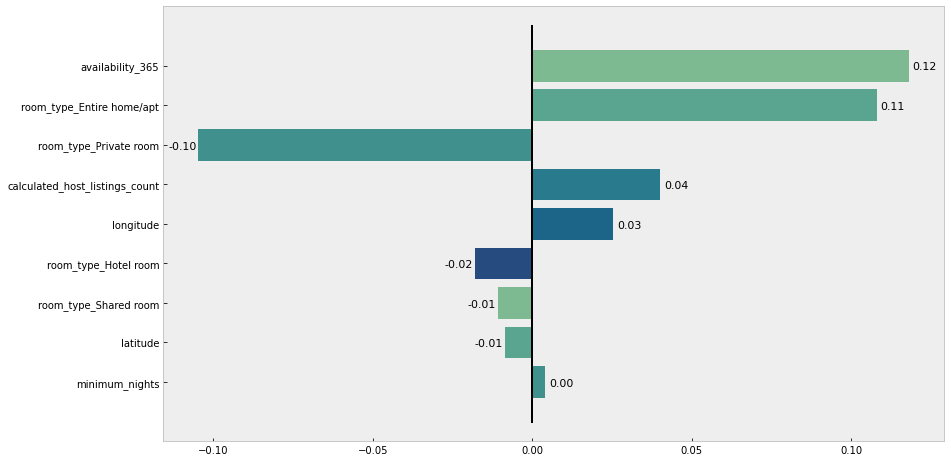

In [50]:
# draw a bar plot with coefficeint of features in desending order of absolute value
x = range(9)
y = coef[ind][:9]
    
plt.figure(figsize=(14,8))
ax = plt.subplot()
    
# draw a vertical black line in the middle
plt.plot([0] * (11), range(-1,10), 'k', linewidth=2)

# invert y axis
plt.gca().invert_yaxis()
ax.set_yticks(x)
ax.set_yticklabels(X.columns[ind][:9])

plt.barh(x, y, color=sns.color_palette('crest'))

# adjust position
for rect, label in zip(ax.patches, y):
    if label >= 0:
        width = rect.get_width() + 0.005
    else:
        width = rect.get_width() - 0.005
    label = '{:.2f}'.format(label)
    ax.text(width, rect.get_y()+0.55, label, ha='center', va='bottom', fontsize=11)
    
plt.grid(False)    
plt.show()